# COMP579 Assignment #1  
Riley Ballachay (261019324)    
Zhanwen Xin (261136034)  

The two authors contribute equally to the assignment

## Question 1

In [ ]:
import numpy as np

class Bandit1(object):
  def __init__(self, p_i:tuple):
    self.p_i = p_i
    self.sim = {i:0 for i in range(len(p_i))}

  def sample(self, i: int, n:int=1):
    """ i here is the arm we are pulling, 
    returning reward or not. n is the number
    of samples we want to take
    """
    _p_i = self.p_i[i] 
    return np.random.choice([1,0], p=[_p_i,1-_p_i],size=n)

  def simulate(self, d:dict):
    """d is a dict with all the actions mapped to the
    number of times we want that action to run. returns
    counter of rewards
    """
    for i, n in d.items():
      self.sim[i] = self.sample(i, n)

    return self.sim.copy()

In [ ]:
DELTA = 0.1
Q_STAR = (0.5, 0.5-DELTA, 0.5-2*DELTA)
SAMPLES = 50

bandit = Bandit1(Q_STAR)
sim = bandit.simulate({0:SAMPLES,1:SAMPLES,2:SAMPLES})


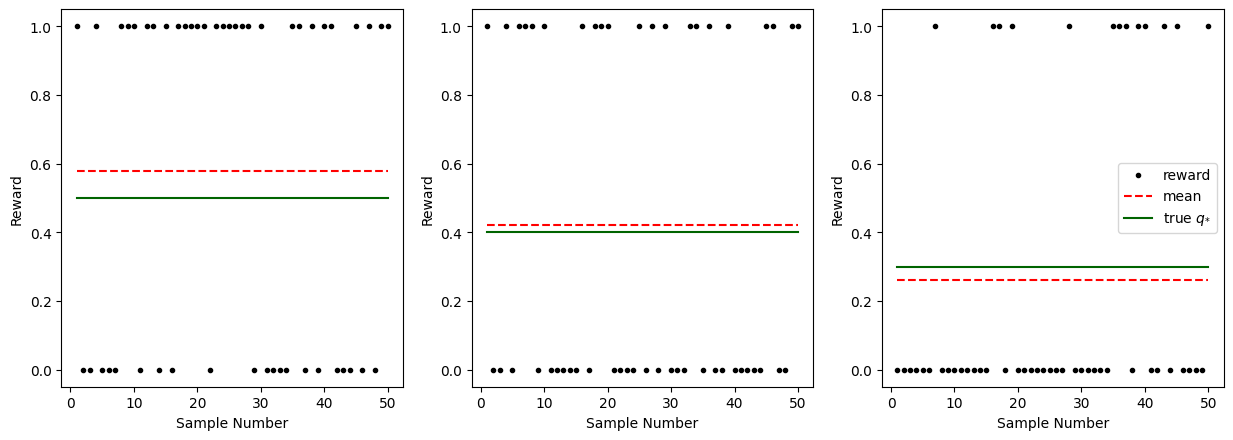

In [ ]:
#%matplotlib notebook
#%matplotlib inline
import matplotlib.pyplot as plt
from functools import partial
fig, axes = plt.subplots(1, 3, figsize=(15,5),dpi=100)

for i, ax in enumerate(axes):
  sim_i = sim[i]
  x = np.arange(1,len(sim_i)+1)
  avg_i = [np.mean(sim[i])]*len(sim_i)
  ax.plot(x, sim_i,'k.', label='reward')
  ax.plot(x, avg_i,'r--',label='mean')
  ax.plot(x, np.full_like(avg_i, Q_STAR[i]),'darkgreen',label='true $q_{*}$')
  ax.set_xlabel('Sample Number')
  ax.set_ylabel('Reward')

# only set legend on last plot
ax.legend()


## Question 2

In [ ]:
import numpy as np

class Bandit2(object):
  def __init__(self, p_i:tuple):
    self.p_i = p_i
    self.sim = {i:0 for i in range(len(p_i))}

  def sample(self, i: int, n:int=1):
    """ i here is the arm we are pulling, 
    returning reward or not. n is the number
    of samples we want to take
    """
    _p_i = self.p_i[i] 
    return np.random.choice([1,0], p=[_p_i,1-_p_i],size=n)
  
  def simulate(self, d:dict, alphas:tuple):
    """d is a dict with all the actions mapped to the
    number of times we want that action to run + alpha. 
    returns dict with 
    """
    Q = {}
    for i, n in d.items():
      self.sim[i] = np.zeros(n)

      Q[i] = {}
      for a in alphas:
        Q[i][a] = np.zeros(n)

    for i, n in d.items():
      for j in range(n):
        R_j = self.sample(i)
        self.sim[i][j] = R_j
        for a in alphas:
          if j==0:
            Q_0 = 0
          else:
            Q_0 = Q[i][a][j-1]
          
          if a=='avg':
            Q[i][a][j] = self.updateAvg(j+1, Q_0, R_j)
          else:
            Q[i][a][j] = self.update(a, Q_0, R_j)

    return self.sim.copy(), Q.copy()

  def calculate(self, sim:dict, alphas:tuple):
    """d is a dict with all the actions mapped to the
    number of times we want that action to run + alpha. 
    returns dict with 
    """
    Q = {}
    for i, n in sim.items():
      Q[i] = {}
      for a in alphas:
        Q[i][a] = np.zeros(len(n))

      for j, R_j in enumerate(n):
        for a in alphas:
          if j==0:
            Q_0 = 0
          else:
            Q_0 = Q[i][a][j-1]
          
          if a=='avg':
            Q[i][a][j] = self.updateAvg(j+1, Q_0, R_j)
          else:
            Q[i][a][j] = self.update(a, Q_0, R_j)
          

    return Q.copy()

  def update(self, alpha:float, Q:float, R:float):
    return Q + alpha*(R-Q)

  def updateAvg(self, n:int, Q:float, R:float):
    return Q + (1/n)*(R-Q)

In [ ]:
ALPHAS = (0.1, 0.01, 'avg')

bandit = Bandit2(Q_STAR)
q_star = bandit.calculate(sim, ALPHAS)


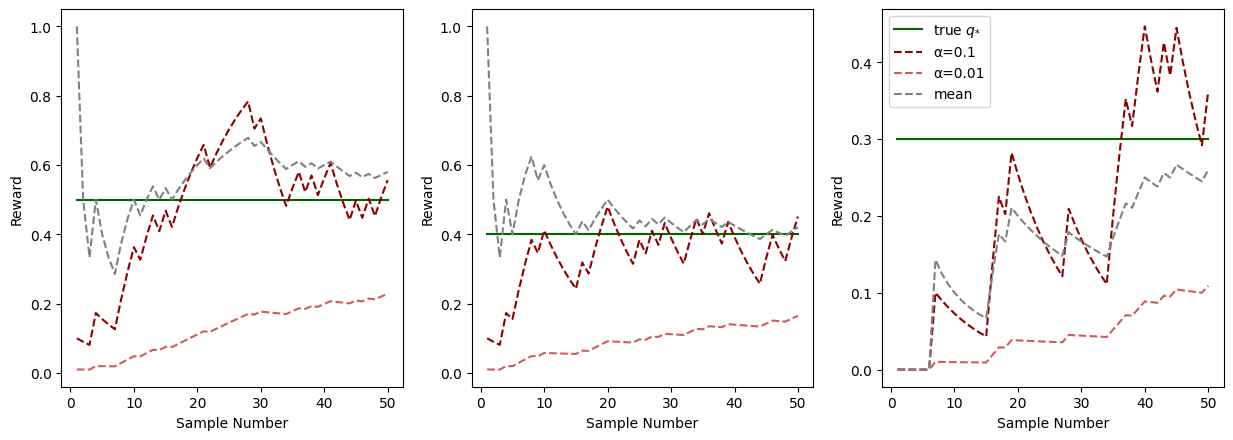

In [ ]:
#%matplotlib notebook
#%matplotlib inline
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15,5),dpi=100)

plt_cfg = {
    0.1:{
         'label':'α=0.1',
         'color':'darkred',
         'linestyle':'--',
    },
    0.01:{
         'label':'α=0.01',
         'color':'indianred',
         'linestyle':'--',
    },
    'avg':{
         'label':'mean',
         'color':'grey',
         'linestyle':'--',
    }
}

for i, ax in enumerate(axes):

  x = np.arange(1,len(q_star[i]['avg'])+1)

  ax.plot(x, np.full_like(avg_i, Q_STAR[i]),'darkgreen',label='true $q_{*}$')
  for a in ALPHAS:
    ax.plot(x, q_star[i][a],color=plt_cfg[a]['color'],linestyle=plt_cfg[a]['linestyle'],label=plt_cfg[a]['label'])
  
  ax.set_xlabel('Sample Number')
  ax.set_ylabel('Reward')

# only set legend on last plot
ax.legend()

## Question 3

In [ ]:
TRIALS = 100

Q = {}
for q_s in range(len(Q_STAR)):
  Q[q_s] = {}
  for a in ALPHAS:
     Q[q_s][a] = np.zeros((TRIALS, SAMPLES))

bandit = Bandit2(Q_STAR)

for trial in range(TRIALS):
  _, results = bandit.simulate({0:SAMPLES,1:SAMPLES,2:SAMPLES}, ALPHAS)

  for q in range(len(Q_STAR)):
    for a in ALPHAS:
      Q[q][a][trial,:] = results[q][a]

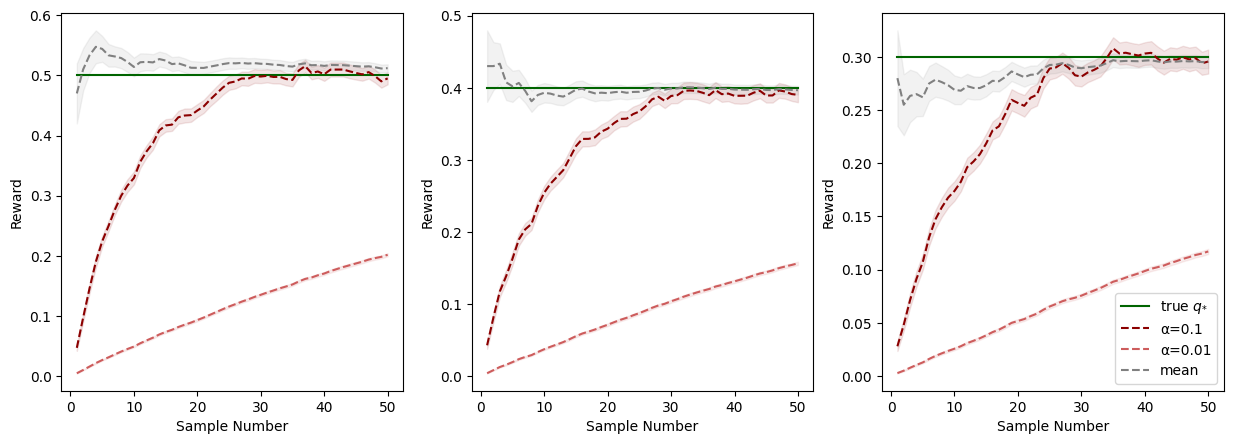

In [ ]:
#%matplotlib notebook
#%matplotlib inline
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15,5),dpi=100)

plt_cfg = {
    0.1:{
         'label':'α=0.1',
         'color':'darkred',
         'linestyle':'--',
    },
    0.01:{
         'label':'α=0.01',
         'color':'indianred',
         'linestyle':'--',
    },
    'avg':{
         'label':'mean',
         'color':'grey',
         'linestyle':'--',
    }
}

for i, ax in enumerate(axes):

  x = np.arange(1,len(np.mean(Q[i]['avg'],axis=0))+1)

  ax.plot(x, np.full_like(avg_i, Q_STAR[i]),'darkgreen',label='true $q_{*}$')
  for a in ALPHAS:
    y = np.mean(Q[i][a],axis=0)
    error = np.std(Q[i][a],axis=0) / np.sqrt(TRIALS)
    ax.plot(x, y,color=plt_cfg[a]['color'],linestyle=plt_cfg[a]['linestyle'],label=plt_cfg[a]['label'])
    ax.fill_between(x, y-error, y+error, color=plt_cfg[a]['color'],alpha=0.1)
  ax.set_xlabel('Sample Number')
  ax.set_ylabel('Reward')

# only set legend on last plot
ax.legend()

$\alpha$=0.1 is better than 0.01 given that $\alpha$=0.1 converges faster to the true value, while the averaging converges the fastest than both $\alpha$ values. If we want to further optimize, we should look for an $\alpha$ value around 0.1

## Question 4

In [ ]:
from typing import List
import random
import numpy as np

class Action:
  def __init__(self, p:float=0, alpha:float=None, **kwargs):
    self.p = p
    self.N = 0
    self.Q = 0
    self.alpha = alpha

  def act(self, n:int=1):
    """ i here is the arm we are pulling, 
    returning reward or not. n is the number
    of samples we want to take
    """

    R = np.random.choice([1,0], p=[self.p,1-self.p],size=n)[0]

    # update
    self.update(R)
    return R.copy()

  def update(self, R):
    self.N += 1
    if self.alpha:
      self.Q =  self.Q + self.alpha*(R-self.Q)
    else:
      self.Q =  self.Q + (1/self.N)*(R-self.Q)

class Bandit:
  def __init__(self, actions: List[Action], epsilon:float):

    self.actions = actions
    self.epsilon = epsilon

    # history object to hold chosen action index
    self.history = {'best_action':[],'reward':[],'regret':[]}

  def act(self, **kwargs):

    # run explore if random is true
    if self.random():
      action_idx = self.act_random(self.actions)
    else:
      action_idx = self.best_action

    # housekeeping
    self.history['best_action'].append(self.best_action)
    self.history['regret'].append(self.regret(action_idx))

    # ACT
    reward = self.actions[action_idx].act()
    self.history['reward'].append(reward)
    return reward

  def regret(self, action_idx):
    return max(list(map(lambda x: x.p, self.actions))) - self.actions[action_idx].p


  def random(self):
    return np.random.choice([1,0], p=[self.epsilon,1-self.epsilon],size=1)[0]

  @property
  def best_action(self):
    # get the actions
    sorted_actions = sorted(self.actions, key=lambda x: x.Q, reverse=True)
    best_actions = list(filter(lambda x: x.Q==sorted_actions[0].Q, sorted_actions))
    if len(best_actions)==1:
      return self.actions.index(best_actions[0])
    best_idxs = list(map(lambda x: self.actions.index(x), best_actions))
    return self.act_random(best_idxs)

  def act_random(self, actions_idxs:int):
    return random.choice(range(len(actions_idxs)))

In [ ]:
TRIALS = 100
STEPS = 1000
DELTA = 0.1
Q_STAR = (0.5, 0.5-DELTA, 0.5-2*DELTA)

def greedy_simulator(epsilon, alpha=None, action=Action):
  summary = np.zeros((TRIALS,STEPS))
  history = np.zeros((TRIALS,STEPS))
  regrets = np.zeros((TRIALS,STEPS))

  for i in range(TRIALS):
    bandit = Bandit([action(Q_STAR[0], alpha), action(Q_STAR[1], alpha), action(Q_STAR[2], alpha)], epsilon)

    for j in range(STEPS):
      reward = bandit.act()

    summary[i,:] = np.array(bandit.history['reward']).ravel()
    history[i,:] = np.array(bandit.history['best_action']).ravel()
    regrets[i,:] = np.array(bandit.history['regret']).ravel()
  return summary, history, regrets

In [ ]:
#%matplotlib notebook
#%matplotlib inline
import matplotlib.pyplot as plt

def get_cmap(n, name='rainbow'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

def plot_greedy(summary, history, regrets, axes, color, label, title):
  ax1, ax2, ax3, ax4 = axes 

  # plot reward over time
  x = np.arange(STEPS)
  y = np.mean(summary,axis=0)
  error = np.std(summary,axis=0)/np.sqrt(TRIALS)

  ax1.title.set_text(title)

  ax1.plot(x, y,color=color,linewidth='1')
  ax1.fill_between(x, y-error, y+error, color=color,alpha=0.1)
  ax1.set_ylabel('Reward at t')
  ax1.set_ylim([0,1])

  # plot fraction that action 1 appears 
  action_1 = (history == 0).astype(int)
  y = np.mean(action_1,axis=0)
  ax2.plot(x,y,linewidth='1',color=color)
  ax2.set_ylabel('Action 1 best action')

  # plot instantaneous regret
  y = np.mean(regrets,axis=0)
  ax3.plot(x,y,linewidth='1',color=color)
  ax3.set_ylabel('Instant Regret')

  # plot cumulative of regret
  cum_regret = np.cumsum(regrets, axis=1)
  y = np.mean(cum_regret,axis=0)
  ax4.plot(x,y,linewidth='1',color=color, label=label)
  ax4.set_ylabel('Cumulative Regret')

  ax4.set_xlabel('Time Step')
  ax4.legend()
  plt.close()
  return fig


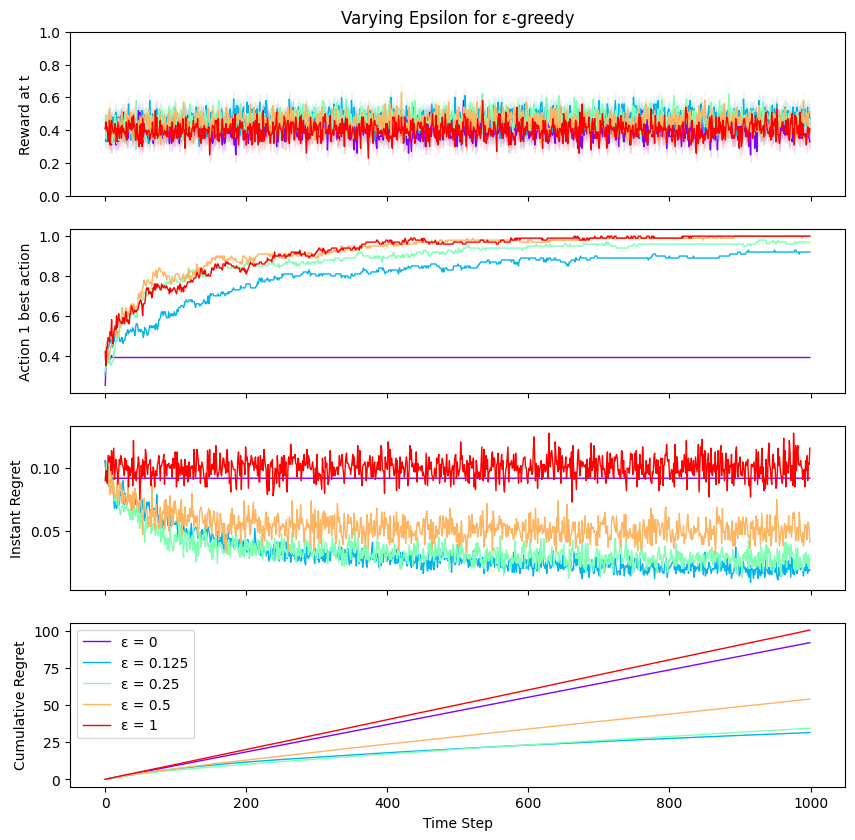

In [ ]:
EPSILONS = (0, 1/8, 1/4, 1/2, 1)
COLORS = get_cmap(len(EPSILONS))

fig, ax_obj = plt.subplots(4, 1, figsize=(10,10),dpi=100, sharex=True)

for i, epsilon in enumerate(EPSILONS):
  summary, history, regrets  = greedy_simulator(epsilon)
  plot_greedy(summary, history, regrets, ax_obj, COLORS(i), f"ε = {epsilon}", "Varying Epsilon for ε-greedy")



*   Average rewards for each $\epsilon$ are close to each other. But it is noted that $\epsilon$=0 and 1 have relatively low rewards, while rewards for $\epsilon$=0.125 and 0.25 are higher.
*   Except $\epsilon$=0 (greedy), model with all other $\epsilon$ values have an increasing fraction of runs in which action 1 is estimated best. The smaller $\epsilon$ is, the slower it converges to 1. $\epsilon$=0 (greedy) gets stuck at a fraction around 0.4 because it does not explore after its first succesful action.
*   $\epsilon$=0 and 1 have stable instant regret throughout all time step. For other $\epsilon$ values, instant regrets decrease at first, then remain stable.
*   The algorithm has linear total regret.


In this case, $\epsilon$=0.125 performs the best because it is a stationary problem that requires few exploration.

## Question 5

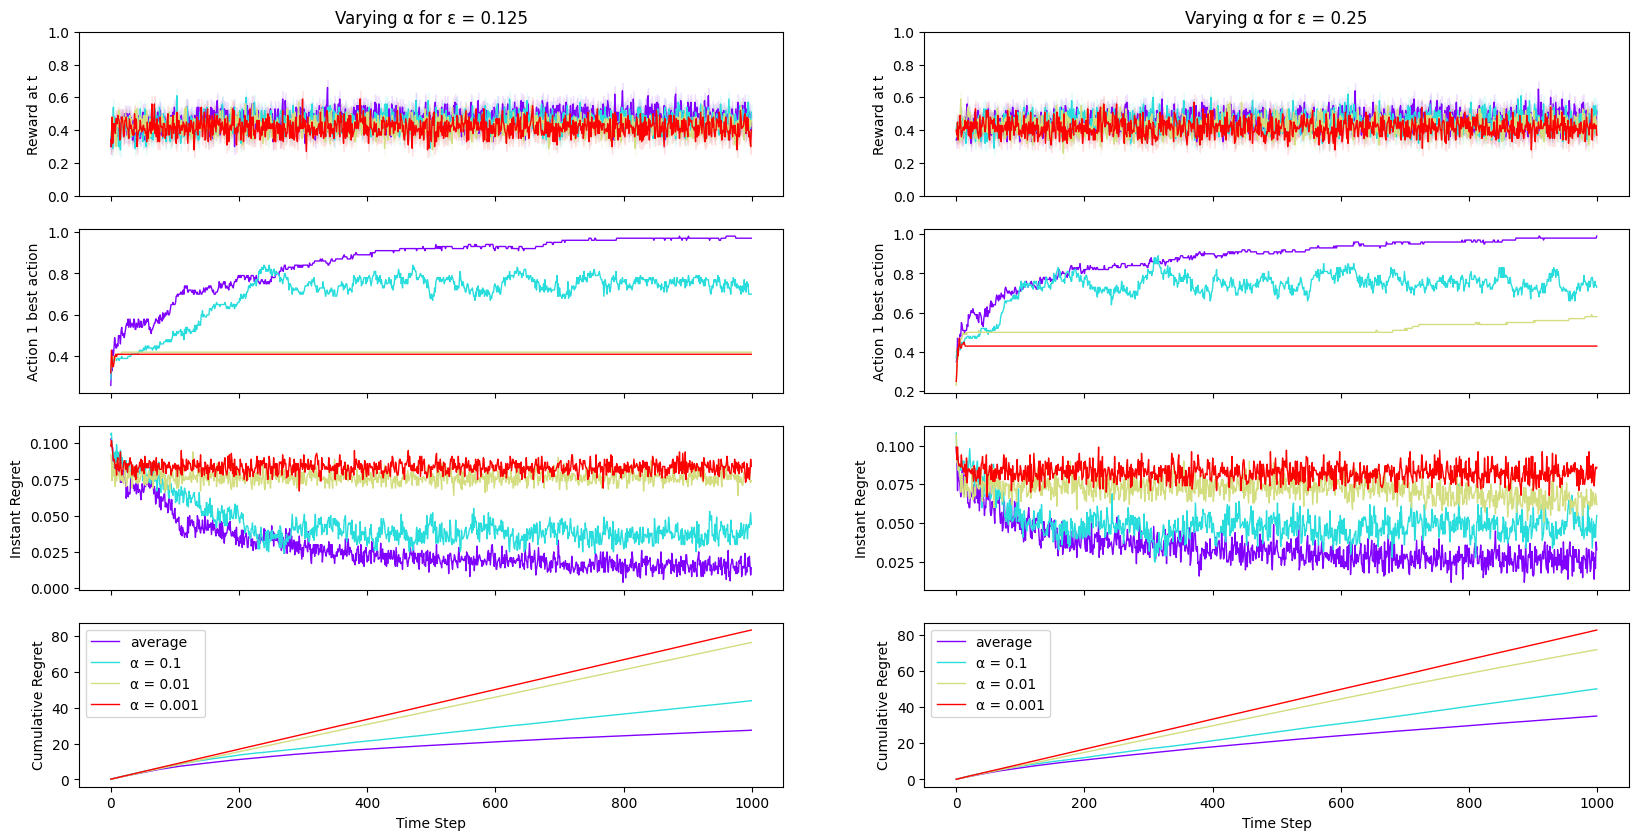

In [ ]:
EPSILONS = (1/8, 1/4)
ALPHAS = (None, 0.1, 0.01, 0.001)
COLORS = get_cmap(len(ALPHAS))
fig, ax_obj = plt.subplots(4, 2, figsize=(20,10),dpi=100, sharex=True)

for i, epsilon in enumerate(EPSILONS):
  for j, alpha in enumerate(ALPHAS):
    summary, history, regrets  = greedy_simulator(epsilon, alpha)
    label = f"α = {alpha}" if alpha else 'average'
    plot_greedy(summary, history, regrets, ax_obj[:,i], COLORS(j), label, f"Varying α for ε = {epsilon}")

For both $\epsilon$=1/4 or 1/8, averaging performs the best with smaller regret, higher reward and higher fraction of runs in which action 1 is estimated best, while algorithm with different $\alpha$ value has a better performance with higher value of $\alpha$. Curves from $\epsilon$=1/8 is less spiky than $\epsilon$=1/4 because the former explores less and has lower variation.

## Question 6

In [ ]:
class ActionUCB(Action):
  def __init__(self, c:int=1, **kwargs):
    super(ActionUCB, self).__init__(**kwargs)
    self.c = c
    self.t=0

  @property
  def A(self):
    return self.Q + self.c * np.sqrt(np.log(self.t)/self.N)

  def step(self):
    self.t +=1


class BanditUCB:
  def __init__(self, actions: List[Action]):

    self.actions = actions

    self.__init_actions()

    # history object to hold chosen action index
    self.history = {'best_action':[],'reward':[],'regret':[]}

  def __init_actions(self):
    for act in self.actions:
      act.step()
      act.act()

  def act(self, t:int):

    for action in self.actions:
      action.step()

    action_idx = self.best_action

    # housekeeping
    self.history['best_action'].append(self.best_action)
    self.history['regret'].append(self.regret(action_idx))

    # ACT
    reward = self.actions[action_idx].act()
    self.history['reward'].append(reward)

    return reward

  def regret(self, action_idx):
    return max(list(map(lambda x: x.p, self.actions))) - self.actions[action_idx].p

  @property
  def best_action(self):
    # get the actions
    sorted_actions = sorted(self.actions, key=lambda x: x.A, reverse=True)
    best_actions = list(filter(lambda x: x.A==sorted_actions[0].A, sorted_actions))
    if len(best_actions)==1:
      return self.actions.index(best_actions[0])

    best_idxs = list(map(lambda x: self.actions.index(x), best_actions))
    return self.act_random(best_idxs)

  def act_random(self, actions_idxs:int):
    return random.choice(range(len(actions_idxs)))

In [ ]:
import numpy as np
TRIALS = 100 
STEPS = 1000
DELTA = 0.1
Q_STAR = (0.5, 0.5-DELTA, 0.5-2*DELTA)

def greedy_simulator(alpha=None, c=None):
  summary = np.zeros((TRIALS,STEPS))
  history = np.zeros((TRIALS,STEPS))
  regrets = np.zeros((TRIALS,STEPS))

  for i in range(TRIALS):
    actions=[ActionUCB(p=Q_STAR[0], alpha=alpha, c=C), ActionUCB(p=Q_STAR[1], alpha=alpha, c=C), ActionUCB(p=Q_STAR[2], alpha=alpha, c=C)]
    bandit = BanditUCB(actions)

    for j in range(STEPS):
      reward = bandit.act(j+1)

    summary[i,:] = np.array(bandit.history['reward']).ravel()
    history[i,:] = np.array(bandit.history['best_action']).ravel()
    regrets[i,:] = np.array(bandit.history['regret']).ravel()

  return summary, history, regrets

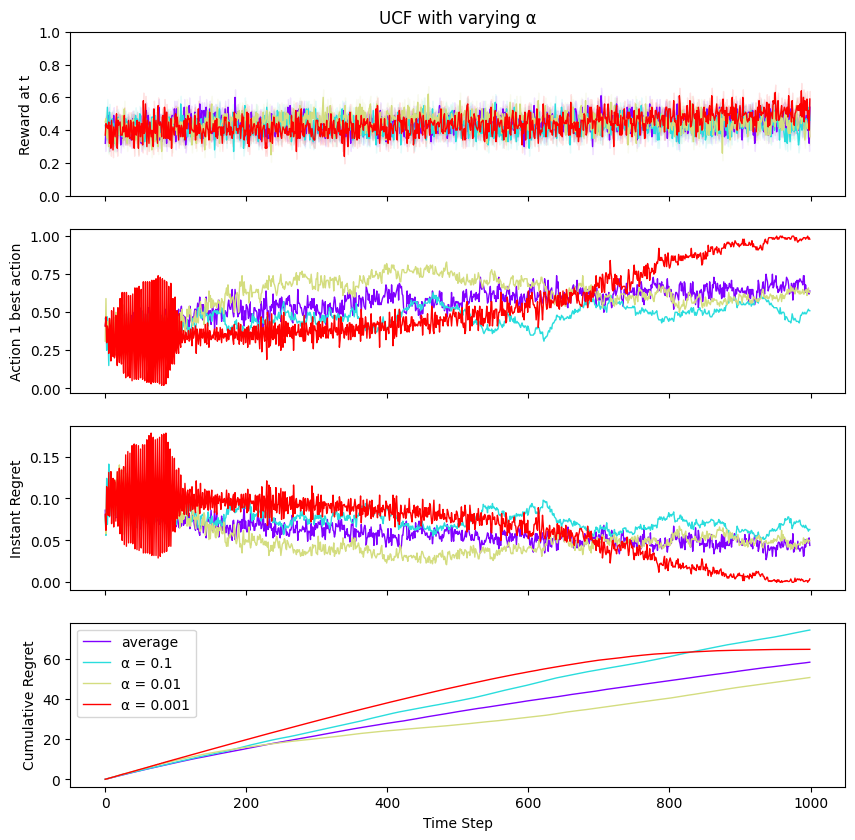

In [ ]:
C = 2
ALPHAS = (None, 0.1, 0.01, 0.001)
COLORS = get_cmap(len(ALPHAS))

fig, ax_obj = plt.subplots(4, 1, figsize=(10,10),dpi=100, sharex=True)

for i, alpha in enumerate(ALPHAS):
  summary, history, regrets  = greedy_simulator(alpha, C)
  label = f"α = {alpha}" if alpha else 'average'
  plot_greedy(summary, history, regrets, ax_obj, COLORS(i), label, f"UCF with varying α" )


*  Reward increases slowly and finally converges to the true value with $\alpha$=0.001. 
*  From the fraction of arm 1 being estimated as the optimal value and the instant regrest, UCB algorithm hesitates in deciding the optimal action at the biginning steps with smaller $\alpha$ value because it explores more at the beginning. As time step increases, $\alpha$=0.001 swithing to exploit more, when it increase the fraction in which action 1 is estimated as the best action and decrease instant regret drastically. 
*  UCB with small $\alpha$ value achieves logarithmic asymptotic total regret.   
  
In this case, $\alpha$=0.001 is the best after around 800 steps, while averaging and $\alpha$=0.01 have better performance at the early steps.

## Question 7

In [ ]:
from typing import List

class BernoulliBandit():
  def __init__(self, theta:float):
    self.success = 1
    self.failure = 1
    self.N=0
    self.Q=0
    self.theta = theta

  @property
  def beta(self):
    return self.__beta()

  def __beta(self):
    return np.random.beta(self.success, self.failure)

  def act(self, n:int=1):

    R = np.random.choice([1,0], p=[self.theta,1-self.theta],size=n)[0]

    # update
    if R:
      self.success+=1
    else:
      self.failure+=1

    return R
  
class ThompsonSampling:
  def __init__(self, actions:List[BernoulliBandit]):
    self.actions = actions

    # history object to hold chosen action index
    self.history = {'best_action':[],'reward':[],'regret':[]}


  def act(self, **kwargs):

    # housekeeping
    self.history['best_action'].append(self.best_action)
    self.history['regret'].append(self.regret(self.best_action))

    # ACT
    reward = self.actions[self.best_action].act()
    self.history['reward'].append(reward)

    return reward

  @property
  def best_action(self):
    max_action = list(map(lambda x: x.beta, self.actions))
    action_idx = np.argmax(max_action)
    return action_idx

  def regret(self, action_idx):
    return max(list(map(lambda x: x.theta, self.actions))) - self.actions[action_idx].theta 


In [ ]:
import numpy as np
TRIALS = 100 
STEPS = 1000
DELTA = 0.1
Q_STAR = (0.5, 0.5-DELTA, 0.5-2*DELTA)

def greedy_simulator():
  summary = np.zeros((TRIALS,STEPS))
  history = np.zeros((TRIALS,STEPS))
  regrets = np.zeros((TRIALS,STEPS))

  for i in range(TRIALS):
    actions=[BernoulliBandit(theta=Q_STAR[0]), BernoulliBandit(theta=Q_STAR[1]), BernoulliBandit(theta=Q_STAR[2])]
    thompson = ThompsonSampling(actions)

    for j in range(STEPS):
      reward = thompson.act()

    summary[i,:] = np.array(thompson.history['reward']).ravel()
    history[i,:] = np.array(thompson.history['best_action']).ravel()
    regrets[i,:] = np.array(thompson.history['regret']).ravel()

  return summary, history, regrets

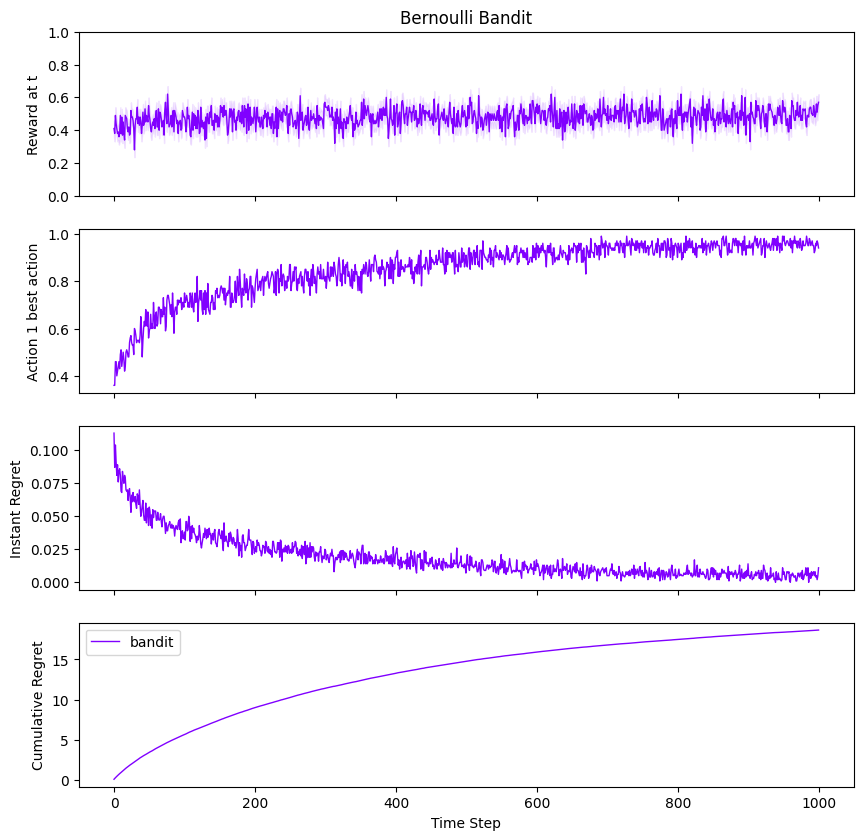

In [ ]:
COLORS = get_cmap(1)

fig, ax_obj = plt.subplots(4, 1, figsize=(10,10),dpi=100, sharex=True)

summary, history, regrets  = greedy_simulator()
plot_greedy(summary, history, regrets, ax_obj, COLORS(0), 'bandit', f"Bernoulli Bandit" )


*  Rewards obtained at each time step by Thompson Sampling are stable around the optimal value. 
*  Fraction in which action 1 is estimated as the best increases fast at the begining, followed by convergence to a value close to 1. 
*  Instant regret drops drastically at the beginning and remains stable. Its lower bound is around 0.05.
*  Total regret of Thompson sampling converges to a value around 20.



## Question 8

In [ ]:
import matplotlib.pyplot as plt

def plot_greedy_best(summary, history, regrets, axes, colors):
  ax1, ax2, ax3, ax4 = axes 

  # plot reward over time
  for i,sum_key in enumerate(summary):
    x = np.arange(STEPS)
    y = np.mean(summary[sum_key],axis=0)
    ax1.plot(x, y,'darkmagenta',linewidth='1', label=sum_key,color=colors(i))
  
  ax1.set_ylabel('Reward at t')
  ax1.legend()
  
  for i,his_key in enumerate(history):
    # plot fraction that action 1 appears 
    action_1 = (history[his_key] == 0).astype(int)
    y = np.mean(action_1,axis=0)
    ax2.plot(x,y,linewidth='1', label=his_key,color=colors(i))
  
  ax2.set_ylabel('Action 1 best action')
  ax2.legend()

  for i,reg_key in enumerate(regrets):
    # plot instantaneous regret
    y = np.mean(regrets[reg_key],axis=0)
    ax3.plot(x,y,linewidth='1',label=reg_key,color=colors(i))
  
  ax3.set_ylabel('Instant Regret')
  ax3.legend()

  for i,reg_key in enumerate(regrets):
    # plot cumulative of regret
    cum_regret = np.cumsum(regrets[reg_key], axis=1)
    y = np.mean(cum_regret,axis=0)
    ax4.plot(x,y,linewidth='1', label=reg_key,color=colors(i))
  
  ax4.set_ylabel('Cumulative Regret')
  ax4.set_xlabel('Time Step')
  ax4.legend()
  plt.close()

  return fig

In [ ]:
import numpy as np
TRIALS = 100 
STEPS = 1000
DELTA = 0.1
Q_STAR = (0.5, 0.5-DELTA, 0.5-2*DELTA)

def greedy_simulator_best():
  ex = np.zeros((TRIALS,STEPS))

  summary = {'Thompson':ex.copy(),'α=0.1 ε=1/8':ex.copy(),'UCB, Average':ex.copy(),'Average, ε=1/8':ex.copy(), 'Average, ε=0':ex.copy()}
  history = {'Thompson':ex.copy(),'α=0.1 ε=1/8':ex.copy(),'UCB, Average':ex.copy(),'Average, ε=1/8':ex.copy(), 'Average, ε=0':ex.copy()}
  regrets = {'Thompson':ex.copy(),'α=0.1 ε=1/8':ex.copy(),'UCB, Average':ex.copy(),'Average, ε=1/8':ex.copy(), 'Average, ε=0':ex.copy()}

  for i in range(TRIALS):
    # parameterize all the models
    thompson = ThompsonSampling([BernoulliBandit(theta=Q_STAR[0]), BernoulliBandit(theta=Q_STAR[1]), BernoulliBandit(theta=Q_STAR[2])])
    bandit = Bandit([Action(Q_STAR[0], .1), Action(Q_STAR[1], .1), Action(Q_STAR[2], .1)], 1/8)
    bandit_ucb = BanditUCB([ActionUCB(p=Q_STAR[0], alpha=None, c=2), ActionUCB(p=Q_STAR[1], alpha=None, c=2), ActionUCB(p=Q_STAR[2], alpha=None, c=2)])
    bandit_avg = Bandit([Action(Q_STAR[0], None), Action(Q_STAR[1], None), Action(Q_STAR[2], None)], 1/8)
    greedy_bandit = Bandit([Action(Q_STAR[0], None), Action(Q_STAR[1], None), Action(Q_STAR[2], None)], 0)

    models = {'Thompson':thompson,'α=0.1 ε=1/8':bandit,'UCB, Average':bandit_ucb,'Average, ε=1/8':bandit_avg, 'Average, ε=0':greedy_bandit}

    for j in range(STEPS):
      for model in models.values():
        # we pass time to every model, but it is ignored with kwargs in all but ucb 
        model.act(t=j+1)

    for name, model in models.items():
      summary[name][i,:] = np.array(model.history['reward']).ravel()
      history[name][i,:] = np.array(model.history['best_action']).ravel()
      regrets[name][i,:] = np.array(model.history['regret']).ravel()

  return summary, history, regrets

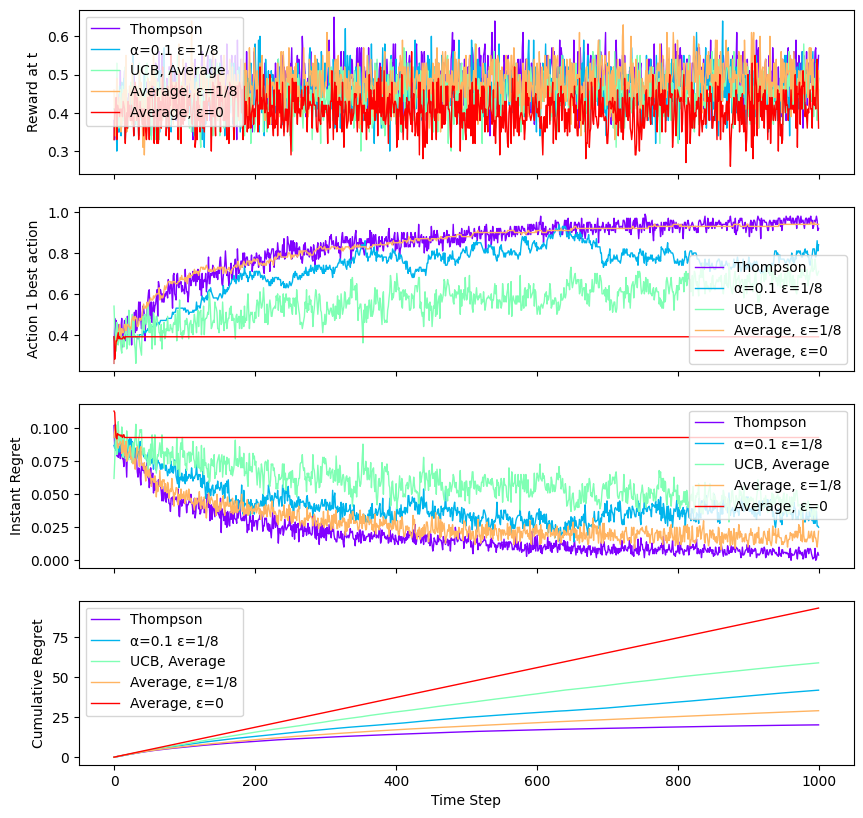

In [ ]:
import matplotlib.pyplot as plt

fig, ax_obj = plt.subplots(4, 1, figsize=(10,10),dpi=100, sharex=True)

summary, history, regrets  = greedy_simulator_best()
colors = get_cmap(len(summary.keys()))
plot_greedy_best(summary, history, regrets, ax_obj, colors)

In the stationary setting, Thompson sampling achieves the lowest instant and cumulative regret, followed by $\epsilon$=1/8 with averaging, $\epsilon$=1/8 with $\alpha$=0.1, UCB and greedy policy. It is because agent does not need to keep exploring since the distribution of rewards remains stationary. 


*   Averaging peforms better than constant $\alpha$ because the former converges faster to the true value. 
*   $\epsilon$-greedy is genrally better than UCB because $\epsilon$-greedy explores less.
*  Greedy policy has the highest regret among all algorithm because it can easily get stuck at a suboptimal action.




## Question 9

In [ ]:
import matplotlib.pyplot as plt

def plot_reward(summary, history, regrets, axes, colors):
  ax1  = axes 

  # plot reward over time
  for i,sum_key in enumerate(summary):
    x = np.arange(STEPS)
    y = np.mean(summary[sum_key],axis=0)
    ax1.plot(x, y,'darkmagenta',linewidth='1', label=sum_key, color = colors(i))

  ax1.set_ylabel('Average Reward')
  ax1.set_ylabel('Average Reward')
  ax1.legend()
  plt.close()
  return fig

In [ ]:
import numpy as np
TRIALS = 100 
STEPS = 1000
DELTA = 0.1
Q_STAR = (0.5, 0.5-DELTA, 0.5-2*DELTA)
Q_STAR_2 = (0.5, 0.5+DELTA, 0.5+2*DELTA)

def greedy_simulator_step():
  ex = np.zeros((TRIALS,STEPS))

  summary = {'Thompson':ex.copy(),'α=0.1 ε=1/4':ex.copy(),'α=0.1 ε=1/8':ex.copy(),'UCB, Average':ex.copy(),'Average, ε=1/4':ex.copy()}

  for i in range(TRIALS):

    thompson = ThompsonSampling([BernoulliBandit(theta=Q_STAR[0]), BernoulliBandit(theta=Q_STAR[1]), BernoulliBandit(theta=Q_STAR[2])])
    bandit_4 = Bandit([Action(Q_STAR[0], .1), Action(Q_STAR[1], .1), Action(Q_STAR[2], .1)], 1/4)
    bandit_8 = Bandit([Action(Q_STAR[0], .1), Action(Q_STAR[1], .1), Action(Q_STAR[2], .1)], 1/8)
    bandit_ucb = BanditUCB([ActionUCB(p=Q_STAR[0], alpha=None, c=2), ActionUCB(p=Q_STAR[1], alpha=None, c=2), ActionUCB(p=Q_STAR[2], alpha=None, c=2)])
    bandit_avg = Bandit([Action(Q_STAR[0], None), Action(Q_STAR[1], None), Action(Q_STAR[2], None)], 1/4)

    models = {'Thompson':thompson,'α=0.1 ε=1/4':bandit_4,'α=0.1 ε=1/8':bandit_8,'UCB, Average':bandit_ucb,'Average, ε=1/4':bandit_avg}

    for j in range(STEPS):
      for model in models.values():
        # we pass time to every model, but only use in UCB
        model.act(t=j+1)

      # change probailities when we hit iteration 500
      if j+1==500:
        for alg in [bandit_4, bandit_8, bandit_ucb]:
          for k,action in enumerate(alg.actions):
            action.p = Q_STAR_2[k]
          
        for k,action in enumerate(thompson.actions):
          action.theta = Q_STAR_2[k]

    for name, model in models.items():
      summary[name][i,:] = np.array(model.history['reward']).ravel()

  return summary, {}, {}

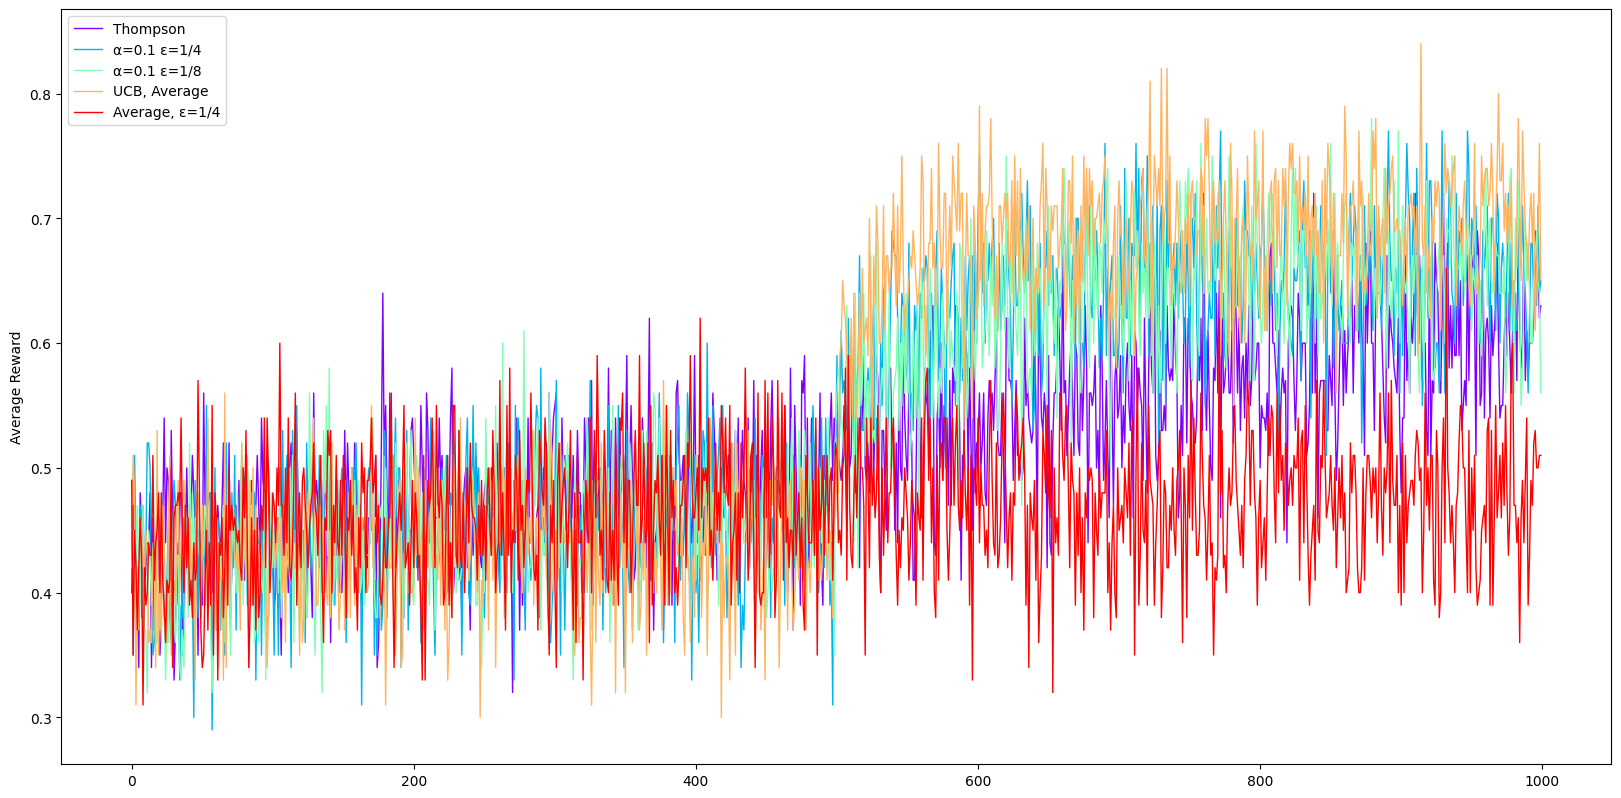

In [ ]:
import matplotlib.pyplot as plt

fig, ax_obj = plt.subplots(1, 1, figsize=(20,10),dpi=100)

summary, history, regrets  = greedy_simulator_step()
colors = get_cmap(len(summary.keys()))
plot_reward(summary, history, regrets, ax_obj, colors)



*   After 500 time steps where true action values change, UCB and $\alpha$=0.1 can quickly capture this change and converge to the new optimal value. UCB is the best in non-stationary setting among all tested algorithm.
*   Thompson sampling response slower to the change and averaging method lies at the bottom.
*   This is because the value estimation update in averaging method and Thompson sampling is higly affected by the rewards receieved in the past after many steps. By contrast, UCB encourages exploration after a few time steps of only exploitation; constant $\alpha$ continue to vary its estimation in response to the most recently received rewards.